TEXT

In [87]:
# IMPORTS
import random
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

In [88]:
# Set random seed to ensure reproducibility
random.seed(37)

In [89]:
# file_path = 'instances_01_KP/low-dimensional/f1_l-d_kp_10_269'
file_path = 'instances_01_KP/low-dimensional/f2_l-d_kp_20_878'
# file_path = 'instances_01_KP/large_scale/knapPI_1_100_1000_1'

data = np.loadtxt(file_path, dtype=int, usecols=(0, 1))
col_1 = data[:, 0]
col_2 = data[:, 1]

n_items = col_1[0]
capacity = col_2[0]

values = data[1:, 0]
weights = data[1:, 1]

# print("First Column:", col_1)
# print("Second Column:", col_2)
print("number of items:", n_items)
print("max weight:", capacity)
print("values:", values)
print("weights:", weights)

number of items: 20
max weight: 878
values: [44 46 90 72 91 40 75 35  8 54 78 40 77 15 61 17 75 29 75 63]
weights: [92  4 43 83 84 68 92 82  6 44 32 18 56 83 25 96 70 48 14 58]


In [90]:
def knapsack_fitness(solution, values, weights, capacity):
    total_weight = np.dot(solution, weights)
    total_value = np.dot(solution, values)
    if total_weight > capacity:
        return 0  # Invalid solution
    return total_value

In [91]:
def generate_random_solution(length):
    return np.random.randint(2, size=length)

In [92]:
test_sol = generate_random_solution(n_items)
test_sol_fitness = knapsack_fitness(test_sol, values, weights, capacity)
print(test_sol)
print(test_sol_fitness)

[1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0]
605


In [93]:
# Store problem items in dictionary

items = {}
for i in range(n_items):
    items[i] = (values[i], weights[i])

print(items)
print(len(items))
print(items[3][1])

{0: (44, 92), 1: (46, 4), 2: (90, 43), 3: (72, 83), 4: (91, 84), 5: (40, 68), 6: (75, 92), 7: (35, 82), 8: (8, 6), 9: (54, 44), 10: (78, 32), 11: (40, 18), 12: (77, 56), 13: (15, 83), 14: (61, 25), 15: (17, 96), 16: (75, 70), 17: (29, 48), 18: (75, 14), 19: (63, 58)}
20
83


In [94]:
def generate_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        neighbor = np.copy(solution)
        neighbor[i] = 1 - neighbor[i] # flip bit in new solution
        # if knapsack_fitness(neighbor, values, weights, capacity) != 0:
        neighbors.append(neighbor)
    return neighbors

In [95]:
neighbors = generate_neighbors(test_sol)
print(neighbors)
print(knapsack_fitness(neighbors[0], values, weights, capacity))

[array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]), array([1, 0, 1, 1, 0, 0, 1, 0, 0,

In [96]:
def hill_climbing():
    sol = generate_random_solution(n_items)
    fit = knapsack_fitness(sol, values, weights, capacity)
    while True:
        neighbors = generate_neighbors(sol)
        neighbors_fits = []
        for neighbor in neighbors:
            neighbors_fits.append(knapsack_fitness(neighbor, values, weights, capacity))
        next_sol_index = np.argmax(neighbors_fits)
        next_sol = neighbors[next_sol_index]
        next_fit = neighbors_fits[next_sol_index]
        print(next_sol)
        print(next_fit)
        if next_fit <= fit:
            break
        sol, fit = next_sol, next_fit
    return tuple(sol)


In [97]:
hc_result = hill_climbing()
print('')
print(hc_result)

[1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1]
598
[1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1]
676
[1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1]
751
[1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1]
826
[1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1]
898
[1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1]
952
[1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1]
935

(1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1)


In [138]:
lon = nx.Graph()
optima = set(hill_climbing() for _ in range(10000))
for opt in optima:
    lon.add_node(opt)

for opt1 in optima:
    for opt2 in optima:
        if sum(1 for i in range(len(opt1)) if opt1[i] != opt2[i]) == 1:
            lon.add_edge(opt1, opt2)

[0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0]
445
[0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0]
535
[0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0]
612
[0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0]
687
[0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0]
762
[0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0]
834
[0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1]
897
[0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
958
[0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
966
[0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
958
[0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1]
712
[0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1]
787
[0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1]
862
[0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
923
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
969
[0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
977
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
969
[1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0]
761
[1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0]
836
[1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0]
882
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0]
922
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0

In [144]:
def print_lon(lon):
    print("CENTRALITY METRICS")
    print("Degree Centrality:", nx.degree_centrality(lon))
    print("Betweenness Centrality:", nx.betweenness_centrality(lon))
    print("Closeness Centrality:", nx.closeness_centrality(lon))
    print('')

    print("Edges:", len(lon.edges()))
    print("Density of the network:", nx.density(lon))
    print("Average Clustering Coefficient:", nx.average_clustering(lon))

    pos = nx.spring_layout(lon)
    nx.draw(lon, pos, with_labels=False, node_size=50)  # Labels are large, so turned off here
    plt.show()

    components = list(nx.connected_components(lon))
    largest_component = max(components, key=len)

    subgraph = lon.subgraph(largest_component)
    print("Diameter of the network:", nx.diameter(subgraph))
    print("Average path length:", nx.average_shortest_path_length(subgraph))

    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=False, node_size=50)  # Labels are large, so turned off here
    plt.show()



CENTRALITY METRICS
Degree Centrality: {(1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1): 0.0, (1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0): 0.0, (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1): 0.0, (1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0): 0.0, (0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1): 0.0, (1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1): 0.0, (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1): 0.0, (1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1): 0.0, (1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1): 0.0, (1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0): 0.0, (1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1): 0.0, (1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0): 0.0, (1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1): 0.0, (1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1): 0.0, (0, 0, 1, 1, 1, 1, 1, 1

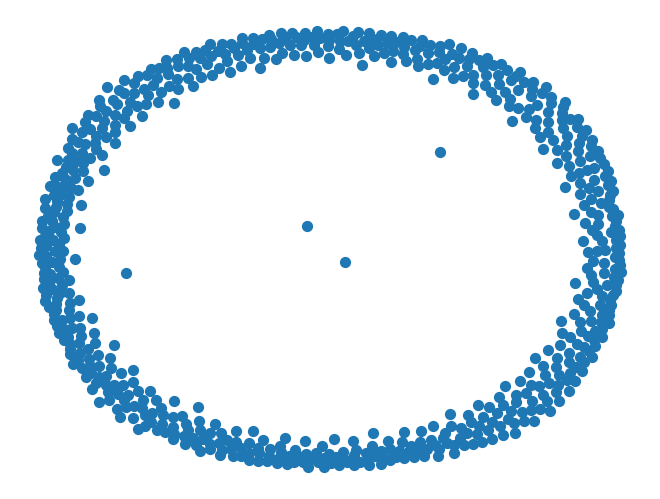

Diameter of the network: 0
Average path length: 0


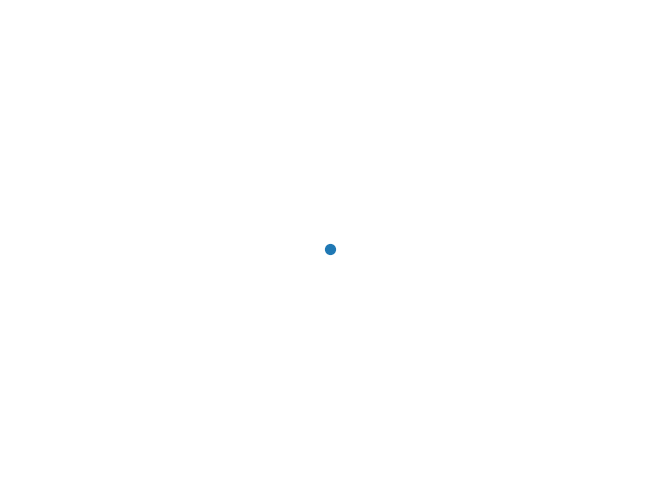

In [145]:
print_lon(lon)